In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
from matplotlib import pyplot

In [2]:
#load in repeats for accession
path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\drive-download-20211014T102922Z-001\all.repeats.from.at9578.csv"
accession = os.path.basename(path)
accession = accession.replace("all.repeats.from.","") #clean file name to get what accession it is
accession = accession.replace(".csv","")

og_accession_df = pd.read_csv(path)

In [3]:
#find robin's contig size file depending on the name of the accession

contig_path = r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\robin contig sizes\_"+accession+"_sizes"
contig_df = pd.read_csv(contig_path, header = None)

In [4]:
#filter repeats based on contig/chromosome size
sizes = []
types = []

for k in range(len(contig_df.index)):
    element = contig_df.iloc[k,0] 
    splitted = element.split("\t") #split string into accession contig/chromosome and size of contig/chromosome
    sizes.append(int(splitted[1]))  #make into integer value and append to list
    types.append(splitted[0]) #append to list
    
contig_df["Contig/Chromosome"] = types
contig_df["Size (bp)"] = sizes #add lists to columns to make dataframe
contig_df.drop(columns = 0, inplace = True) #remove original column

filtered = pd.DataFrame(columns = ["Contig/chromosome","Size (bp)"]) #create empty filtered dataframe
for k in contig_df.index:
    if  contig_df.iloc[k,1] > 1000000:#filter by size, only keep those bigger than one megabase
        filtered = filtered.append({"Contig/chromosome": contig_df.iloc[k,0], "Size (bp)": contig_df.iloc[k,1]}, ignore_index = True)

In [5]:
#make new filtered dataframe
filtered_list = filtered["Contig/chromosome"].tolist()

temp = []
for element in filtered_list:
    element = element.replace(accession+"_","")
    #unique_list = og_accession_df["fasta.name"].value_counts()
    temp.append(og_accession_df.get(og_accession_df["fasta.name"] == element))
    accession_df = pd.concat(temp, ignore_index = True)


<Figure size 72000x72000 with 0 Axes>

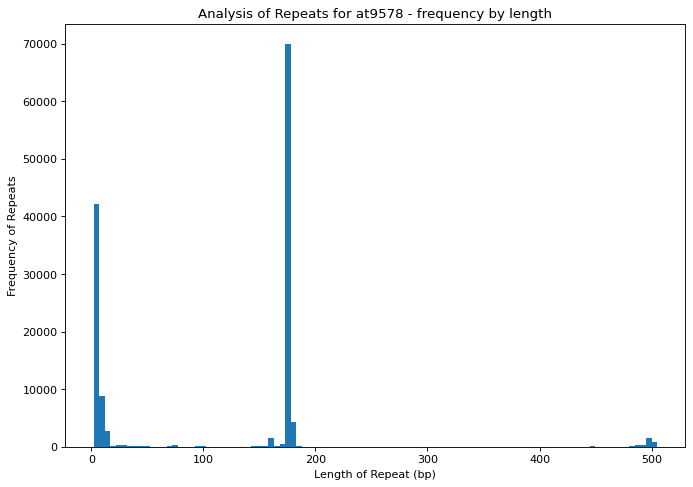

<Figure size 72000x72000 with 0 Axes>

In [6]:
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot
accession_df = og_accession_df
plt.pyplot.hist(accession_df["length"], bins = 100)

plt.pyplot.xlabel("Length of Repeat (bp)")
plt.pyplot.ylabel("Frequency of Repeats")
plt.pyplot.title("Analysis of Repeats for "+accession+" - frequency by length")
width = 1000
height = 1000
plt.pyplot.figure(figsize=(width, height))

In [7]:
# majority of repeats around ~180bp, spike also around ~10bp (telomeres?)
# focussing on telomeric repeats, setting x limits to 150-200

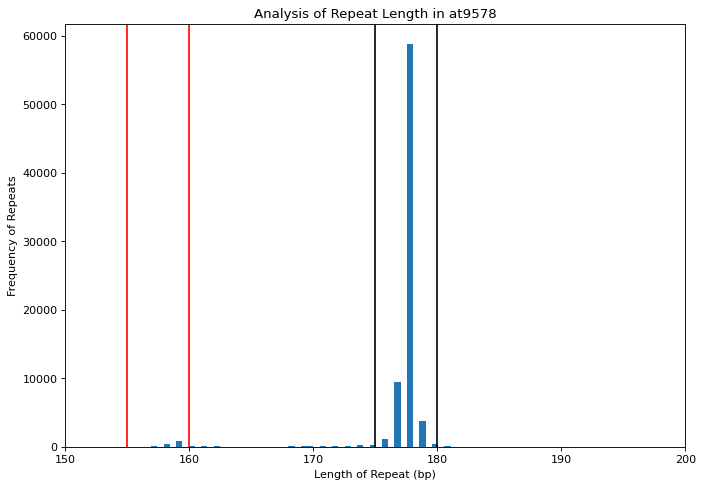

In [8]:
plt.pyplot.figure(figsize=(10,7), dpi= 80) #change size of plot
plt.pyplot.hist(accession_df["length"], bins = 1000)

plt.pyplot.xlabel("Length of Repeat (bp)")
plt.pyplot.ylabel("Frequency of Repeats")
plt.pyplot.xlim(150,200)
plt.pyplot.title("Analysis of Repeat Length in "+accession)
plt.pyplot.axvline(155, color='r') #add arbitrary line to graph
plt.pyplot.axvline(160, color='r')
plt.pyplot.axvline(175, color='black')
plt.pyplot.axvline(180, color='black')
#plt.pyplot.figure(figsize=(width, height))
plt.pyplot.savefig(r"C:\Users\Christie and Victori\Documents\christie\work uni\part II\project\cleaning_sequences\histograms\Analysis of Repeat Length in "+accession+".png")

#peak around ~178bp and also consider small peak around ~160bp